In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
import warnings
warnings.simplefilter('ignore')

In [4]:
from project.ranker.ranker import RankingPredictor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

/home/howl/miniconda3/envs/Tesis/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/home/howl/miniconda3/envs/Tesis/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('estimator', RankingPredictor("ma_100", n_neighbors=15)),
])

In [6]:
mf_data, fs_data = pipeline.named_steps['estimator'].get_data()

### Evaluacion

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedKFold
from project.feature_selection.feature_selector import FeatureSelection
import numpy as np
scores = cross_val_score(pipeline, mf_data, fs_data, scoring='mean_squared_error', cv=RepeatedKFold(10, 30))
np.mean(scores)

-2.5605555555555553

In [42]:
mf_data.columns

Index(['X_correlation_max', 'X_correlation_mean', 'X_correlation_min',
       'X_covariance_max', 'X_covariance_mean', 'X_covariance_min',
       'X_exp_var_max', 'X_exp_var_n_t80_cumsum', 'X_kurtosis_max',
       'X_kurtosis_mean', 'X_kurtosis_min', 'X_minmax_covariance_max',
       'X_minmax_covariance_mean', 'X_minmax_covariance_min',
       'X_minmax_exp_var_max', 'X_minmax_stand_dev_max',
       'X_minmax_stand_dev_mean', 'X_minmax_stand_dev_min',
       'X_minmax_var_coef_max', 'X_minmax_var_coef_mean',
       'X_minmax_var_coef_min', 'X_num_attrs_none', 'X_num_obs_none',
       'X_ratio_obs_attrs_none', 'X_skewness_max', 'X_skewness_mean',
       'X_skewness_min', 'X_stand_dev_max', 'X_stand_dev_mean',
       'X_stand_dev_min', 'X_std_covariance_max', 'X_std_covariance_mean',
       'X_std_covariance_min', 'X_std_exp_var_max', 'X_var_coef_max',
       'X_var_coef_mean', 'X_var_coef_min', 'y_norm_class_entropy_none',
       'y_num_classes_none'],
      dtype='object')

In [98]:
mse = []
for i in range(2, 30):
    pipeline = Pipeline([
        ('scale', StandardScaler()),
        ('estimator', RankingPredictor("ma_100", n_neighbors=i)),
    ])
    scores = cross_val_score(pipeline, mf_data[['y_norm_class_entropy_none',
                                                'X_ratio_obs_attrs_none',
                                                #'X_correlation_mean',
                                                #'X_covariance_mean',
                                                #'X_stand_dev_mean',
                                                #'X_skewness_mean',
                                               ]],
                             fs_data, scoring='mean_squared_error', cv=RepeatedKFold(5, 100))
    mse.append({"k": i,
                "score": np.mean(scores)})    

In [99]:
import pandas as pd

In [100]:
mse = pd.DataFrame(mse)

In [101]:
import matplotlib.pyplot as plt

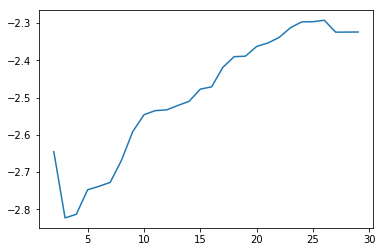

In [102]:
plt.plot(mse['k'], mse['score'])

# Random rank

In [22]:
from project.ranker.ranker import RandomRankingPredictor

In [23]:
rr = RandomRankingPredictor(rank_size=4)

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import numpy as np
scores = cross_val_score(rr, mf_data, fs_data, scoring='mean_squared_error', cv=RepeatedKFold(5,100))
np.mean(scores)

-2.49575

# Spearman rank correlation

In [110]:
from sklearn.model_selection import train_test_split

In [105]:
from scipy.stats import spearmanr

In [113]:
X_train, X_test, y_train, y_test =  train_test_split(mf_data.values, fs_data.values)

In [126]:
y_pred = rr.predict(y_test)

In [132]:
spearmanr(y_test[0], y_pred[0])

SpearmanrResult(correlation=-0.19999999999999998, pvalue=0.8)

In [128]:
y_test[0]

array([3, 1, 4, 2])

In [129]:
y_pred[0]

array([2, 4, 3, 1])

In [117]:
y_train[0]

array([2, 3, 1, 4])

In [118]:
y_train[1]

array([4, 3, 2, 1])

In [119]:
y_train[2]

array([4, 3, 1, 2])